- Data Frames
- It is a table with multiple rows and columns
- Various format of files can able to read using data frames.
- Files like excel, csv, json etc,.

In [1]:
import pandas as pd

In [2]:
#Create data frames

d1 = pd.DataFrame([1,2,3,4])
d1

,0
0,1
1,2
2,3
3,4


In [3]:
d2 = pd.DataFrame([["Alekhya",10,2020],["Naga",11,2020]])
d2

,0,1,2
0,Alekhya,10,2020
1,Naga,11,2020


In [4]:
d2 = pd.DataFrame([["Alekhya",10,2020],["Naga",11,2020]],
                 columns = ("Name","rollnum","year"),
                 index = ['a','b'])
d2

,Name,rollnum,year
a,Alekhya,10,2020
b,Naga,11,2020


In [5]:
dict1 = {"Name" : ["Alekhya","Naga","Mounika","Niharik"],
        "rollnum" : [10,11,12,13],
        "year" : [2015,2016,2017,2018]}
d3 = pd.DataFrame(dict1, index = ['a','b','c','d'])
d3

,Name,rollnum,year
a,Alekhya,10,2015
b,Naga,11,2016
c,Mounika,12,2017
d,Niharik,13,2018


In [6]:
d3.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [7]:
d3.columns

Index(['Name', 'rollnum', 'year'], dtype='object')

In [8]:
d3.shape

(4, 3)

- Accessing elements¶

In [9]:
d3['Name']# getting column

a    Alekhya
b       Naga
c    Mounika
d    Niharik
Name: Name, dtype: object

In [10]:
d3["Name"][1]# getting value

'Naga'

In [11]:
d3[0:2]

,Name,rollnum,year
a,Alekhya,10,2015
b,Naga,11,2016


In [12]:
d3[-1:]

,Name,rollnum,year
d,Niharik,13,2018


In [13]:
#Load DataSet

In [14]:
data = pd.read_csv('market.csv')
data.head(10)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
6,Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.36
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.37


In [15]:
data.tail()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,3872.8700,0.03,23,565.34,30.00,0.62
8398,Ord_5459,Prod_6,SHP_7628,Cust_1798,603.6900,0.00,47,131.39,4.86,0.38


In [16]:
data.sample(3)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
485,Ord_33,Prod_4,SHP_43,Cust_16,1210.0515,0.04,11,-104.25,7.69,0.58
7617,Ord_2419,Prod_5,SHP_3318,Cust_945,44.1700,0.02,5,23.41,4.00,0.42
5237,Ord_744,Prod_8,SHP_1014,Cust_250,264.6300,0.02,9,-66.78,4.00,0.75


In [17]:
data.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')

In [18]:
data.index

RangeIndex(start=0, stop=8399, step=1)

In [19]:
data.shape

(8399, 10)

In [20]:
#Statistical Analysis

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 10 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 656.2+ KB


In [22]:
data.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


In [23]:
#Selecting Rows

In [24]:
data[2:7]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37
6,Ord_31,Prod_12,SHP_41,Cust_26,14.76,0.01,5,1.32,0.50,0.36


In [25]:
data[5::2].head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.37
11,Ord_1925,Prod_6,SHP_2637,Cust_708,465.9000,0.05,38,79.34,4.86,0.38
13,Ord_2207,Prod_11,SHP_3093,Cust_839,3364.2480,0.10,15,-693.23,61.76,0.78


In [26]:
#Selecting Columns

In [27]:
data['Sales'].head()# single column

0     136.81
1      42.27
2    4701.69
3    2337.89
4    4233.15
Name: Sales, dtype: float64

In [28]:
data[['Sales','Discount']].tail()# multiple columns

,Sales,Discount
8394,2841.4395,0.08
8395,127.1600,0.10
8396,243.0500,0.02
8397,3872.8700,0.03
8398,603.6900,0.00


In [29]:
#Indexing
#iloc and loc
#iloc --> Position based index
#loc --> Label based index

In [30]:
data.iloc[2]

Ord_id                  Ord_5446
Prod_id                   Prod_4
Ship_id                 SHP_7610
Cust_id                Cust_1818
Sales                    4701.69
Discount                       0
Order_Quantity                26
Profit                    1148.9
Shipping_Cost                2.5
Product_Base_Margin         0.59
Name: 2, dtype: object

In [31]:
data.iloc[2,4]

4701.69

In [32]:
data.iloc[[3,7,8]]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52


In [33]:
data.iloc[4:8]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
6,Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.36
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55


In [34]:
data.iloc[3:6,2:5]

,Ship_id,Cust_id,Sales
3,SHP_7625,Cust_1818,2337.89
4,SHP_7664,Cust_1818,4233.15
5,SHP_7608,Cust_1818,164.02


In [35]:
data.loc[4,'Sales']

4233.15

In [36]:
data.loc[[3,7,8]]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52


In [37]:
#Filtering

In [38]:
data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [39]:
data['Sales'] > 5000

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17       True
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8369    False
8370    False
8371    False
8372    False
8373    False
8374    False
8375    False
8376    False
8377    False
8378    False
8379    False
8380    False
8381    False
8382    False
8383    False
8384    False
8385    False
8386    False
8387    False
8388    False
8389    False
8390    False
8391    False
8392    False
8393    False
8394    False
8395    False
8396    False
8397    False
8398    False
Name: Sales, Length: 8399, dtype: bool

In [40]:
data[data['Sales'] > 50000]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
2738,Ord_3084,Prod_17,SHP_4279,Cust_1151,89061.05,0.0,13,27220.69,24.49,0.39


In [43]:

d1 = data[(data['Sales'] > 30000) & (data["Profit"]>2000)]

In [44]:
d1

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
1835,Ord_3875,Prod_17,SHP_5370,Cust_1351,41343.21,0.09,8,3852.19,24.49,0.39
2349,Ord_2373,Prod_14,SHP_3259,Cust_942,33367.85,0.01,9,3992.52,24.49,0.37
2738,Ord_3084,Prod_17,SHP_4279,Cust_1151,89061.05,0.00,13,27220.69,24.49,0.39


In [45]:
#Sorting
#Ascending Order
#Descending Order

In [46]:
data.sort_values(by = ['Prod_id'],inplace = True)


In [47]:
data

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
1593,Ord_1067,Prod_1,SHP_1474,Cust_397,7333.45,0.07,27,-207.28,35.00,0.80
6127,Ord_1791,Prod_1,SHP_2482,Cust_838,416.40,0.02,24,24.33,4.96,0.58
4794,Ord_4923,Prod_1,SHP_6867,Cust_1681,1438.33,0.08,43,163.38,8.22,0.57
2595,Ord_4464,Prod_1,SHP_6219,Cust_1445,279.77,0.07,8,-14.02,8.22,0.57
7772,Ord_3210,Prod_1,SHP_4452,Cust_1183,494.34,0.05,15,-30.19,6.72,0.75
5570,Ord_909,Prod_1,SHP_1253,Cust_307,189.04,0.08,16,-74.77,8.60,0.57
2596,Ord_4249,Prod_1,SHP_5933,Cust_1445,299.01,0.09,38,-142.86,6.50,0.59
2131,Ord_4792,Prod_1,SHP_6679,Cust_1568,292.38,0.05,8,6.11,6.31,0.58
2597,Ord_4250,Prod_1,SHP_5936,Cust_1445,6152.80,0.04,27,554.55,28.66,0.72
1014,Ord_1172,Prod_1,SHP_1618,Cust_449,529.28,0.10,45,-30.27,4.81,0.58


In [48]:
data.sort_values(by = ['Prod_id'],inplace = False, ascending = False)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
8177,Ord_5166,Prod_9,SHP_7220,Cust_1755,347.84,0.00,37,-99.25,8.29,0.38
975,Ord_5081,Prod_9,SHP_7094,Cust_1724,541.47,0.05,49,90.62,4.80,0.36
5300,Ord_2558,Prod_9,SHP_3500,Cust_944,1287.94,0.06,37,140.35,14.72,0.40
7955,Ord_4065,Prod_9,SHP_5669,Cust_1376,733.55,0.07,8,103.13,19.99,0.40
2506,Ord_262,Prod_9,SHP_358,Cust_66,6553.45,0.03,39,2969.81,19.99,0.39
2394,Ord_4480,Prod_9,SHP_6239,Cust_1478,462.12,0.00,28,226.40,1.39,0.38
2387,Ord_3270,Prod_9,SHP_4540,Cust_1220,51.66,0.06,7,7.40,1.39,0.36
300,Ord_5180,Prod_9,SHP_7237,Cust_1756,862.64,0.04,23,122.11,14.72,0.40
8295,Ord_2147,Prod_9,SHP_2928,Cust_787,125.57,0.03,22,-45.16,5.30,0.35
113,Ord_135,Prod_9,SHP_182,Cust_45,30.83,0.04,2,7.27,1.39,0.36


In [49]:
#Data Preprocessing with Scikit-Learn
#Scikit-Learn is a library in Machine Learning
#It supports a machine learning algorithm like SVM, knn, Neural networks etc
#It supports different types of Data Preprocessing methods
#Scalling is used to compressing the values into a fixed range(0,1)

In [81]:
import numpy as np
d = pd.DataFrame({
    'x1': np.random.normal(0,2,10000),
    'x2': np.random.normal(5,3,10000),
    'x3': np.random.normal(-5,5,10000)
})
d.head()

,x1,x2,x3
0,1.294798,0.290383,-11.181595
1,-0.035263,8.565986,-4.669830
2,4.115986,9.951691,-10.783814
3,-1.986183,7.816977,-5.077887
4,1.721339,7.693414,-3.838906


In [52]:
d.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,-0.042175,5.031892,-4.925981
std,2.014144,3.039795,4.999082
min,-7.379150,-7.131353,-24.437105
25%,-1.369689,2.959038,-8.323110
50%,-0.056572,5.050839,-4.924038
75%,1.324980,7.050404,-1.488908
max,8.197731,16.474919,14.358445


### DataPreprocessing:
- Data preprocessing is used for improve the quality of data

- Problems in data:

    - insufficient data
    - Too much data
    - Missing data
    - Duplicate data
    - outliers
- Outliers: In general term it is a data point that is significantly further away from the other data points



### Scaling Techniques
- Standard Scaler
- Robust Scaler

- Normalization
- Range scaling(Min Max Scaller)
- By using MinMaxScaller we can provide custom range for scaling the data

In [53]:
#Standard Scaler
#SD is a useful technique to transform the attributes with a gaussian distribution
#when data can take a any range of values it makes difficult to interpret. so, datascientists will 
#convert the data into standard format
#0=> mean 1=>standara diviation
#[Xi - mean(X)] / std(X)

In [54]:
from sklearn import preprocessing

In [55]:
sc1 = preprocessing.StandardScaler()

In [56]:
sc1_d = sc1.fit_transform(d)

In [57]:
sc1_d

array([[ 1.0186454 ,  1.40961087,  0.3479223 ],
       [-1.35643527, -0.94224809, -0.0691635 ],
       [ 1.32577848,  0.40694657, -1.6503552 ],
       ...,
       [-0.05090722, -0.00693634, -1.77055251],
       [ 0.08002509, -0.78366483,  0.05212091],
       [ 0.26308038,  0.72951903, -1.6298685 ]])

In [58]:
sc1_data = pd.DataFrame(sc1_d,columns = d.columns)

In [59]:
sc1_data.head()

,x1,x2,x3
0,1.018645,1.409611,0.347922
1,-1.356435,-0.942248,-0.069163
2,1.325778,0.406947,-1.650355
3,-1.382978,0.242126,-1.704824
4,0.725099,1.345629,0.379761


In [60]:
d.head()

,x1,x2,x3
0,2.009421,9.316606,-3.186776
1,-2.774094,2.167795,-5.271718
2,2.628000,6.268865,-13.175830
3,-2.827552,5.767868,-13.448110
4,1.418206,9.122123,-3.027621


In [61]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

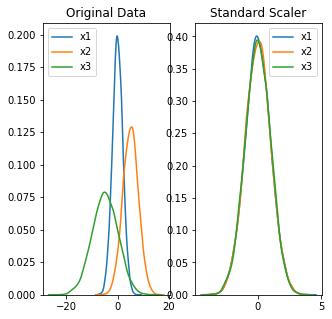

In [62]:
#Keranal Dencity Estimate plot is used for display the multiple samples data into one graph.
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (5,5))

ax1.set_title('Original Data')
sns.kdeplot(d['x1'],ax=ax1)
sns.kdeplot(d['x2'],ax=ax1)
sns.kdeplot(d['x3'],ax=ax1)
ax2.set_title('Standard Scaler')
sns.kdeplot(sc1_data['x1'],ax=ax2)
sns.kdeplot(sc1_data['x2'],ax=ax2)
sns.kdeplot(sc1_data['x3'],ax=ax2)
plt.show()

In [86]:
#Robust Scaler
#The range is between interquartile ranger(25% to 75%)
#[Xi - Q1(X)] / [Q3(X) - Q1(X)]
#Q1 --> 25%(Lower Quartile)
#Q2 --> 75%(Upper Quartiler)
#Robost scalling also used for scale the outliers, it scale using median and Inter Quartail Range(IQR)

In [63]:
d.head()

,x1,x2,x3
0,2.009421,9.316606,-3.186776
1,-2.774094,2.167795,-5.271718
2,2.628000,6.268865,-13.175830
3,-2.827552,5.767868,-13.448110
4,1.418206,9.122123,-3.027621


In [64]:
rs = preprocessing.RobustScaler()

In [65]:

rs_d = rs.fit_transform(d)

In [66]:
rs_d

array([[ 0.76669654,  1.04262688,  0.25420115],
       [-1.00848085, -0.70466547, -0.05087352],
       [ 0.99625324,  0.2977065 , -1.2074258 ],
       ...,
       [-0.03270604, -0.00978407, -1.29534334],
       [ 0.06515508, -0.58684748,  0.03783916],
       [ 0.20197385,  0.5373588 , -1.19244094]])

In [67]:
#Normalizer
#L1 norm also known as manhattan distance
#Xi / sqrt(X1^2 + X2^2 + X^3)

In [68]:
d.head()

,x1,x2,x3
0,2.009421,9.316606,-3.186776
1,-2.774094,2.167795,-5.271718
2,2.628000,6.268865,-13.175830
3,-2.827552,5.767868,-13.448110
4,1.418206,9.122123,-3.027621


In [69]:
n = preprocessing.Normalizer()

In [70]:
n_d = n.fit_transform(d)

In [71]:
n_d

array([[ 0.19995233,  0.92707154, -0.31710791],
       [-0.43760684,  0.34196452, -0.83160118],
       [ 0.1772573 ,  0.42283176, -0.88870307],
       ...,
       [-0.00987044,  0.34179317, -0.93972337],
       [ 0.0221734 ,  0.49374908, -0.86932168],
       [ 0.03260596,  0.4846876 , -0.87407939]])

In [72]:
n_d = pd.DataFrame(n_d,columns = d.columns)

In [73]:
n_d.head()

,x1,x2,x3
0,0.199952,0.927072,-0.317108
1,-0.437607,0.341965,-0.831601
2,0.177257,0.422832,-0.888703
3,-0.189724,0.387014,-0.902344
4,0.145974,0.938925,-0.311628


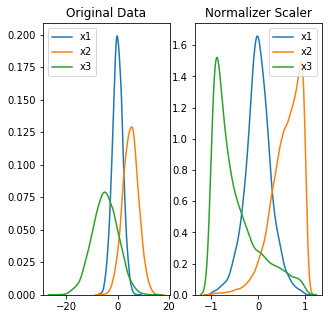

In [74]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (5,5))

ax1.set_title('Original Data')
sns.kdeplot(d['x1'],ax=ax1)
sns.kdeplot(d['x2'],ax=ax1)
sns.kdeplot(d['x3'],ax=ax1)
ax2.set_title('Normalizer Scaler')
sns.kdeplot(n_d['x1'],ax=ax2)
sns.kdeplot(n_d['x2'],ax=ax2)
sns.kdeplot(n_d['x3'],ax=ax2)
plt.show()

In [79]:
#Normalization:¶
#upto now we are scale by using features(columns)
#In certain cases we want to scale the individual data observation(rows)
#when clustering data we need to apply normalization

In [82]:
from sklearn.preprocessing import Normalizer
n=Normalizer()
n_data=n.fit_transform(d)
n_data

array([[ 0.11499034,  0.02578878, -0.9930318 ],
       [-0.00361444,  0.87799866, -0.47864944],
       [ 0.27007171,  0.65298325, -0.70758331],
       ...,
       [ 0.14826887,  0.9677766 ,  0.20353084],
       [ 0.07806079,  0.71545686, -0.69428236],
       [ 0.44632505,  0.51912103, -0.7289083 ]])

In [84]:
n_data_df=pd.DataFrame(n_data,columns=d.columns)
n_data_df.head()

,x1,x2,x3
0,0.114990,0.025789,-0.993032
1,-0.003614,0.877999,-0.478649
2,0.270072,0.652983,-0.707583
3,-0.208398,0.820186,-0.532791
4,0.196307,0.877379,-0.437800


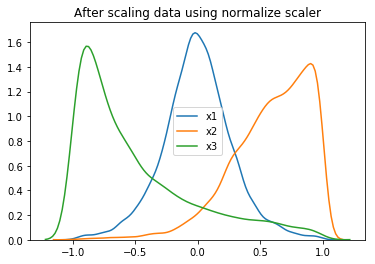

In [85]:
plt.title("After scaling data using normalize scaler")
sns.kdeplot(n_data_df['x1'])
sns.kdeplot(n_data_df['x2'])
sns.kdeplot(n_data_df['x3'])


In [87]:
#Data cleaning:
#missing data [replace,dropna,fillna]
#fill the missing values using scikit-learn
#duplicate data

In [88]:
a=np.array([[1,2,np.nan,3,4],
           [10,12,13,14,15],
           [67,34,29,70,55],
           [np.nan,10,23,np.nan,34],
           [67,np.nan,31,54,np.nan],
           [90,np.nan,np.nan,45,np.nan]]
          )
a

array([[ 1.,  2., nan,  3.,  4.],
       [10., 12., 13., 14., 15.],
       [67., 34., 29., 70., 55.],
       [nan, 10., 23., nan, 34.],
       [67., nan, 31., 54., nan],
       [90., nan, nan, 45., nan]])

In [90]:
df=pd.DataFrame(a,columns=["one","two","three","four","five"])
df

,one,two,three,four,five
0,1.0,2.0,NaN,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,NaN,10.0,23.0,NaN,34.0
4,67.0,NaN,31.0,54.0,NaN
5,90.0,NaN,NaN,45.0,NaN


In [91]:

df.isnull().sum()

one      1
two      2
three    2
four     1
five     2
dtype: int64

In [92]:
df[df.isnull().any(axis=1)]

,one,two,three,four,five
0,1.0,2.0,NaN,3.0,4.0
3,NaN,10.0,23.0,NaN,34.0
4,67.0,NaN,31.0,54.0,NaN
5,90.0,NaN,NaN,45.0,NaN


In [93]:
# we can handle nan value using two ways
# dropna
# fillna

df.dropna()

,one,two,three,four,five
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0


In [94]:
df['one']=df['one'].replace(np.nan,0)

In [95]:
df

,one,two,three,four,five
0,1.0,2.0,NaN,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,0.0,10.0,23.0,NaN,34.0
4,67.0,NaN,31.0,54.0,NaN
5,90.0,NaN,NaN,45.0,NaN


In [96]:
df['two'].mean()

14.5

In [97]:
df['two']=df['two'].fillna(df['two'].mean())

In [98]:
df

,one,two,three,four,five
0,1.0,2.0,NaN,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,0.0,10.0,23.0,NaN,34.0
4,67.0,14.5,31.0,54.0,NaN
5,90.0,14.5,NaN,45.0,NaN


In [99]:
df['three']=df['three'].fillna(df['three'].median())

In [100]:
df

,one,two,three,four,five
0,1.0,2.0,26.0,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,0.0,10.0,23.0,NaN,34.0
4,67.0,14.5,31.0,54.0,NaN
5,90.0,14.5,26.0,45.0,NaN


In [101]:
df.fillna(method='ffill')

,one,two,three,four,five
0,1.0,2.0,26.0,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,0.0,10.0,23.0,70.0,34.0
4,67.0,14.5,31.0,54.0,34.0
5,90.0,14.5,26.0,45.0,34.0


In [102]:

df.fillna(method='bfill')

,one,two,three,four,five
0,1.0,2.0,26.0,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,0.0,10.0,23.0,54.0,34.0
4,67.0,14.5,31.0,54.0,NaN
5,90.0,14.5,26.0,45.0,NaN


In [103]:
df

,one,two,three,four,five
0,1.0,2.0,26.0,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,0.0,10.0,23.0,NaN,34.0
4,67.0,14.5,31.0,54.0,NaN
5,90.0,14.5,26.0,45.0,NaN


In [104]:
df.fillna(method='ffill',limit=1)

,one,two,three,four,five
0,1.0,2.0,26.0,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,0.0,10.0,23.0,70.0,34.0
4,67.0,14.5,31.0,54.0,34.0
5,90.0,14.5,26.0,45.0,NaN


In [105]:
df

,one,two,three,four,five
0,1.0,2.0,26.0,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,0.0,10.0,23.0,NaN,34.0
4,67.0,14.5,31.0,54.0,NaN
5,90.0,14.5,26.0,45.0,NaN


In [106]:
df.fillna(method='ffill',limit=2)

,one,two,three,four,five
0,1.0,2.0,26.0,3.0,4.0
1,10.0,12.0,13.0,14.0,15.0
2,67.0,34.0,29.0,70.0,55.0
3,0.0,10.0,23.0,70.0,34.0
4,67.0,14.5,31.0,54.0,34.0
5,90.0,14.5,26.0,45.0,34.0
